In [2]:
import sklearn
import numpy as np
from keras.models import Model, Sequential
from sklearn.cluster import KMeans
from keras.layers import Dense,Input
from keras.datasets import fashion_mnist
from sklearn import metrics
import matplotlib.pyplot as plt
import keras.callbacks
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture

Using TensorFlow backend.
/home/sufiyan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sufiyan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sufiyan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sufiyan/.local/lib/python3.6/site-packages/tensorflow/py

In [3]:
# my function to plot loss for autoencoder
class plotloss(keras.callbacks.Callback):

    def on_train_begin(self,logs={}):
        self.losses = []
        self.val_losses = []


    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [4]:
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

xtrain = xtrain.reshape((xtrain.shape[0], -1))
xtest = xtest.reshape((xtest.shape[0], -1))
xtrain = np.divide(xtrain, 255.)
xtest = np.divide(xtest, 255.)

In [6]:
# TASK1
print("\t\t\tTASK1 : K-MEANS")
n = len(np.unique(ytrain)) # here it is known to be 10

kmeans = KMeans(n_clusters=n,n_init=20,n_jobs=4,max_iter=500)

trModel = kmeans.fit(xtrain) # fit the training data to the model

ypred_train0 = trModel.predict(xtrain)
ypred_test0 = trModel.predict(xtest)

conf_matrix1 = confusion_matrix(ytest,ypred_test0)
print("\nCONFUSION MATRIX:\n")
print(conf_matrix1)

res = metrics.normalized_mutual_info_score(ytrain,ypred_train0)
print("\ntraining accuracy:", res*100,"%")

res0 = metrics.normalized_mutual_info_score(ytest,ypred_test0)
print("\ntesting accuracy:", res0*100,"%")

			TASK1 : K-MEANS

CONFUSION MATRIX:

[[ 94  34 244   6   0   5 587   1   0  29]
 [ 22   9  29   0   0   0  50   0   0 890]
 [ 61 566 342   4   0   4  19   0   0   4]
 [ 94  10 112   2   0   3 276   0   0 503]
 [ 42 627 159   4   0   5 136   0   0  27]
 [650   0   6   0  72   0   0 227  45   0]
 [115 311 358  15   0   0 189   0   0  12]
 [ 62   0   0   0 152   0   0 784   2   0]
 [ 84  61  35 353  10 408   3  39   1   6]
 [ 29   0   4   0 519   2   0  23 423   0]]

training accuracy: 51.17809798851256 %

testing accuracy: 51.28135461974378 %


/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [23]:
encoding_dim = 32 # dimension of the compressed image

autoencoder = Sequential() # can also add layers in this step, but I do it seperately to trace my steps

#add 3 encoder layers
autoencoder.add(
    Dense(4*encoding_dim,input_shape=(784,),activation='relu')
)
autoencoder.add(
    Dense(2*encoding_dim,activation='relu')
)
autoencoder.add(
    Dense(encoding_dim,activation='relu')
)

#add 3 decoder layers
autoencoder.add(
    Dense(2*encoding_dim,activation='relu')
)
autoencoder.add(
    Dense(4*encoding_dim,activation='relu')
)
autoencoder.add(
    Dense(784,activation='sigmoid')
)

loss_graph = plotloss() # to plot losses

autoencoder.compile(
                    optimizer='adadelta', 
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                    )

# train the auto encoder

autoencoder.fit(
                xtrain,
                xtrain,
                epochs=25,
                batch_size=256,
                validation_data=(xtest,xtest),
                callbacks=[loss_graph]
                )

#extract the encoder from the autoencoder
inp_img = Input(shape=(784,))
enc_layer1 = autoencoder.layers[0]
enc_layer2 = autoencoder.layers[1]
enc_layer3 = autoencoder.layers[2]
encoder = Model(inp_img,enc_layer3(enc_layer2(enc_layer1(inp_img))))
#encoder = Model(inp_img,enc_layer2(enc_layer1(inp_img)))


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.5195 - accuracy: 0.4428 - val_loss: 0.4143 - val_accuracy: 0.4914
Epoch 2/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.3887 - accuracy: 0.4913 - val_loss: 0.3862 - val_accuracy: 0.4806
Epoch 3/25
60000/60000 [==============================] - 4s 75us/step - loss: 0.3686 - accuracy: 0.4943 - val_loss: 0.3635 - val_accuracy: 0.4984
Epoch 4/25
60000/60000 [==============================] - 5s 85us/step - loss: 0.3558 - accuracy: 0.4969 - val_loss: 0.3540 - val_accuracy: 0.4911
Epoch 5/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.3454 - accuracy: 0.4984 - val_loss: 0.3429 - val_accuracy: 0.5007
Epoch 6/25
60000/60000 [==============================] - 5s 76us/step - loss: 0.3380 - accuracy: 0.4995 - val_loss: 0.3344 - val_accuracy: 0.5007
Epoch 7/25
60000/60000 [==============================] - 5s 81us/st



AUTOENCODER MODEL
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
____________________________

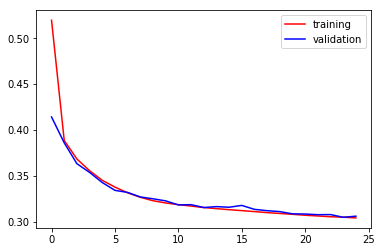

In [24]:
print("\n\nAUTOENCODER MODEL")
#summary of my autoencoder
autoencoder.summary()
print("\n\nENCODER MODEL")
#summary of encoder
encoder.summary()
print("\n")
plt.plot(loss_graph.losses,'r',label = 'training')
plt.plot(loss_graph.val_losses,'b',label = 'validation')
plt.legend()

In [25]:
# get the encoded images
encoded_train_imgs = encoder.predict(xtrain)
encoded_test_imgs = encoder.predict(xtest)

In [26]:
# TASK2
print("\t\t\tTASK 2 : AUTOENCODER BASED K-MEANS")

""" AutoEncoder based K-Means """
kmeans1 = KMeans(n_clusters=10,n_init=20,n_jobs=4,max_iter=500)
kmeansModel = kmeans1.fit(encoded_train_imgs)

ypred_test1 = kmeansModel.predict(encoded_test_imgs)
ypred_train1 = kmeansModel.predict(encoded_train_imgs)

conf_matrix1 = confusion_matrix(ytest,ypred_test1)
print("\nCONFUSION MATRIX:\n")
print(conf_matrix1)

res1 = metrics.normalized_mutual_info_score(ytrain,ypred_train1)
print("\ntraining accuracy:", res1*100,"%")

res2 = metrics.normalized_mutual_info_score(ytest,ypred_test1)
print("\ntesting accuracy:", res2*100,"%")

			TASK 2 : AUTOENCODER BASED K-MEANS

CONFUSION MATRIX:

[[  8   0 571  22   0   0   1   0 313  85]
 [  0   0   4  12   0 734   0   0  47 203]
 [ 15   0  12 607   0   0   0   0 357   9]
 [  4   0  30  49   0 142   0   0 192 583]
 [ 14   0   0 715   0   0   0   0 161 110]
 [ 15  32   0   0 204   0 411 214 124   0]
 [ 32   0 148 313   0   2   1   0 446  58]
 [  4 202   0   0 611   0 178   5   0   0]
 [693   2   1  31   2   0  62   0 172  37]
 [ 14 422   0   0  10   0  25 515  14   0]]

training accuracy: 52.980473194363576 %

testing accuracy: 52.76899300270792 %


/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [27]:
# TASK3
print("\t\t\tTASK 3 : AUTOENCODER BASED GMM")
""" AutoEncoder based GMM """
gmm = GaussianMixture(n_components=10,n_init=20,max_iter=500)
gmmModel = gmm.fit(encoded_train_imgs)

ypred_test = gmmModel.predict(encoded_test_imgs)
ypred_train = gmmModel.predict(encoded_train_imgs)

conf_matrix2 = confusion_matrix(ytest,ypred_test)
print("\nCONFUSION MATRIX:\n")
print(conf_matrix2)

res3 = metrics.normalized_mutual_info_score(ytrain,ypred_train)
print("\ntraining accuracy:", res3*100,"%")

res4 = metrics.normalized_mutual_info_score(ytest,ypred_test)
print("\ntesting accuracy:", res4*100,"%")

			TASK 3 : AUTOENCODER BASED GMM

CONFUSION MATRIX:

[[ 75   0   0   4   2  37  13 788  19  62]
 [ 77   0   0   0   0 853   1  44   9  16]
 [ 12   0   0   5   1   9   2  34  51 886]
 [178   0   0   3   1 566   1 191  22  38]
 [ 25   0   0  12   0  71   4  89 100 699]
 [  1 229 379   3 157   1 227   0   3   0]
 [ 36   0   0  15   1  51   7 289  52 549]
 [  0  62 721   0   0   0 217   0   0   0]
 [121   1   3 547   6   3 250   5  18  46]
 [  0 832   6   0  43   0 111   0   8   0]]

training accuracy: 53.23998056160747 %

testing accuracy: 53.22101204777998 %


/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sufiyan/.local/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
